In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import when, col, avg, row_number, sum, year, month, dayofmonth, lower, regexp_replace
from pyspark.sql.functions import current_date, expr
from pyspark.sql.window import Window
from pyspark.sql import SparkSession

#create session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()


In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema= StructType(
    [
        StructField("match_id", IntegerType(), True),
        StructField("over_id", IntegerType(), True),
        StructField("ball_id", IntegerType(), True),
        StructField("innings_no", IntegerType(), True),
        StructField("team_batting", StringType(), True),
        StructField("team_bowling", StringType(), True),
        StructField("striker_batting_position", IntegerType(), True),
        StructField("extra_type", StringType(), True),
        StructField("runs_scored", IntegerType(), True),
        StructField("extra_runs", IntegerType(), True),
		StructField("wides", IntegerType(), True),
		StructField("legbyes", IntegerType(), True),
		StructField("byes", IntegerType(), True),
		StructField("noballs", IntegerType(), True),
		StructField("penalty", IntegerType(), True),
		StructField("bowler_extras", IntegerType(), True),
		StructField("out_type", StringType(), True),
		StructField("caught", BooleanType(), True),
		StructField("bowled", BooleanType(), True),
		StructField("run_out", BooleanType(), True),
		StructField("lbw", BooleanType(), True),
		StructField("retired_hurt", BooleanType(), True),
		StructField("stumped", BooleanType(), True),
		StructField("caught_and_bowled", BooleanType(), True),
		StructField("hit_wicket", BooleanType(), True),
		StructField("obstructingfeild", BooleanType(), True),
		StructField("bowler_wicket", BooleanType(), True),
		StructField("match_date", DateType(), True),
		StructField("season", IntegerType(), True),
		StructField("striker", IntegerType(), True),
		StructField("non_striker", IntegerType(), True),
		StructField("bowler", IntegerType(), True),
		StructField("player_out", IntegerType(), True),
		StructField("fielders", IntegerType(), True),
		StructField("striker_match_sk", IntegerType(), True),
		StructField("strikersk", IntegerType(), True),
		StructField("nonstriker_match_sk", IntegerType(), True),
		StructField("nonstriker_sk", IntegerType(), True),
		StructField("fielder_match_sk", IntegerType(), True),
		StructField("fielder_sk", IntegerType(), True),
		StructField("bowler_match_sk", IntegerType(), True),
		StructField("bowler_sk", IntegerType(), True),
		StructField("playerout_match_sk", IntegerType(), True),
		StructField("battingteam_sk", IntegerType(), True),
		StructField("bowlingteam_sk", IntegerType(), True),
		StructField("keeper_catch", BooleanType(), True),
		StructField("player_out_sk", IntegerType(), True),
		StructField("matchdatesk", DateType(), True)
    ]
)

In [0]:
ball_by_ball_df = spark.read.format("csv")\
                    .option("header","true")\
                    .schema(ball_by_ball_schema)\
                    .load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:

match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

match_df = spark.read.format("csv")\
                .option("header","true")\
                .schema(match_schema)\
                .load("s3://ipl-data-analysis-project/Match.csv")
match_df.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|  BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab|

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player.csv")


In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Player_match.csv")

     

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Team.csv")
     


In [0]:
ball_by_ball_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- over_id: integer (nullable = true)
 |-- ball_id: integer (nullable = true)
 |-- innings_no: integer (nullable = true)
 |-- team_batting: string (nullable = true)
 |-- team_bowling: string (nullable = true)
 |-- striker_batting_position: integer (nullable = true)
 |-- extra_type: string (nullable = true)
 |-- runs_scored: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- wides: integer (nullable = true)
 |-- legbyes: integer (nullable = true)
 |-- byes: integer (nullable = true)
 |-- noballs: integer (nullable = true)
 |-- penalty: integer (nullable = true)
 |-- bowler_extras: integer (nullable = true)
 |-- out_type: string (nullable = true)
 |-- caught: boolean (nullable = true)
 |-- bowled: boolean (nullable = true)
 |-- run_out: boolean (nullable = true)
 |-- lbw: boolean (nullable = true)
 |-- retired_hurt: boolean (nullable = true)
 |-- stumped: boolean (nullable = true)
 |-- caught_and_bowled: boolean (null

In [0]:
#Fliter to include only valid deliveries (excluding extras like wides and no balls for specific analysis)
ball_by_ball_df = ball_by_ball_df.where((col("wides")==0) & (col("noballs")==0))

In [0]:
# Aggregation: Calculate the total and average runs scored in each match 
total_and_avg_runs = ball_by_ball_df.groupBy("match_id","innings_no").agg(sum("runs_scored").alias("total_runs"), avg("runs_scored").alias("average_runs")
)
total_and_avg_runs.show(5)

+--------+----------+----------+------------------+
|match_id|innings_no|total_runs|      average_runs|
+--------+----------+----------+------------------+
|  980940|         1|       138|              1.15|
|  419132|         1|       162|              1.35|
| 1082632|         2|       202|1.9238095238095239|
|  335993|         2|       131|1.6794871794871795|
| 1082617|         1|       123|1.0512820512820513|
+--------+----------+----------+------------------+
only showing top 5 rows



In [0]:
# Window function: Calculate running total of runs in each match for each over
window = Window.partitionBy("match_id","innings_no").orderBy("over_id")
ball_by_ball_df = ball_by_ball_df.withColumn("running_total", sum(col("runs_scored")).over(window))

In [0]:
ball_by_ball_df.show(2)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+----------------+-------------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
#Condition column: Flag the high impact balls(either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn("high_impact_ball", when((col("runs_scored")+col("extra_runs")>6)| (col("bowler_wicket")==True), True).otherwise(False))
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+----------------+-------------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:


ball_by_ball_df.where(col("high_impact_ball")==True).show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+----------------+-------------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
#Extracting year, month and day from the match_Date
match_df = match_df.withColumn("year", year(col("match_date")))
match_df = match_df.withColumn("month", month(col("match_date")))
match_df = match_df.withColumn("day", dayofmonth(col("match_date")))
match_df.show(5)


+--------+--------+--------------------+-------------------+----------+-----------+--------------------+----------+------------+-------------------+-------------------+---------+--------+------------+------------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|              team2|match_date|season_year|          venue_name| city_name|country_name|        toss_winner|       match_winner|toss_name|win_type|outcome_type|   manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+-------------------+----------+-----------+--------------------+----------+------------+-------------------+-------------------+---------+--------+------------+------------+----------+----------+----+-----+----+-------------------+-----------------+
|       1|  335988|     Kings XI Punjab|Chennai Super Kings|      null|       2008|Punjab Cricket As...|Chandigarh|       India|Ch

In [0]:
#High margin win: Categorizing win margins into 'high', 'medium', 'low'
match_df = match_df.withColumn("win_margin_category", when(col("win_margin")>=100,"High")
.when((col("win_margin")>=50 ) & (col("win_margin")<100),"Medium" )
.otherwise("low")
)
match_df.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       1|  335988|     Kings XI Punjab| Chennai Super Kings|      null|       2008|Punjab Cricket As...|Chandigarh|  

In [0]:
#Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn("toss_match_winner",when(col("toss_winner")==col("match_winner"),"Yes")
.otherwise("No")
 ).filter(col("toss_match_winner")==True)
match_df.show(5)

+--------+--------+--------------------+-------------------+----------+-----------+--------------------+----------+------------+-------------------+-------------------+---------+--------+------------+------------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|              team2|match_date|season_year|          venue_name| city_name|country_name|        toss_winner|       match_winner|toss_name|win_type|outcome_type|   manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+-------------------+----------+-----------+--------------------+----------+------------+-------------------+-------------------+---------+--------+------------+------------+----------+----------+----+-----+----+-------------------+-----------------+
|       1|  335988|     Kings XI Punjab|Chennai Super Kings|      null|       2008|Punjab Cricket As...|Chandigarh|       India|Ch

In [0]:
#Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name","[^a-zA-Z0-9]","")))

#Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({"batting_hand":"unknown", "bowling_skill":"unknown"})

#Categorizing players based on batting hand
player_df = player_df.withColumn("batting_style",when(col("batting_hand").contains("left"),"Left Handed")
                                 .otherwise("Right Handed"))
#Show the modified player DataFrame
player_df.show(5)

+---------+---------+--------------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|   player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+--------------+----+--------------+------------------+------------+-------------+
|        0|        1|     scganguly|null| Left-hand bat|  Right-arm medium|       India| Right Handed|
|        1|        2|    bbmccullum|null|Right-hand bat|  Right-arm medium| New Zealand| Right Handed|
|        2|        3|     rtponting|null|Right-hand bat|  Right-arm medium|   Australia| Right Handed|
|        3|        4|      djhussey|null|Right-hand bat|Right-arm offbreak|   Australia| Right Handed|
|        4|        5|mohammadhafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan| Right Handed|
+---------+---------+--------------+----+--------------+------------------+------------+-------------+
only showing top 5 rows



In [0]:
#Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn("veteran", when(col("age_as_on_match")>35,"Yes").otherwise("No")
)

#Filter to include only players who played the match (excluding bench players)
# player_match_df.select(col("batting_status")).distinct().show()
# player_match_df = player_match_df.filter(col("batting_status")!="Did not Bat")

#Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn("years_since_debut", year(current_date()-col("season_year")))
player_match_df.show(5)


+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+-------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+---

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsmen_per_season = spark.sql(""" SELECT
          p.player_name,
          m.season_year,
          sum(b.runs_scored) as total_runs                                 
from ball_by_ball b
join match m
on b.match_id = m.match_id
join player_match pm
on m.match_id = pm.match_id and b.striker=pm.player_id
join player p
on p.player_id = pm.player_id
group by p.player_name, m.season_year
order by m.season_year, total_runs desc                                            
                                           """)
top_scoring_batsmen_per_season.show()                        

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|stjayasuriya|       2008|       350|
|    ykpathan|       2008|       321|
| acgilchrist|       2008|       312|
|     gcsmith|       2008|       306|
|    djhussey|       2008|       239|
|    srwatson|       2008|       237|
|     semarsh|       2008|       223|
|   scganguly|       2008|       221|
|    rgsharma|       2008|       219|
|     msdhoni|       2008|       211|
|     skraina|       2008|       203|
|  saasnodkar|       2008|       190|
|    ggambhir|       2008|       179|
|   mekhussey|       2008|       163|
|     papatel|       2008|       151|
|       mkaif|       2008|       149|
|    jamorkel|       2008|       146|
|     rdravid|       2008|       138|
|   spfleming|       2008|       136|
|kcsangakkara|       2008|       134|
+------------+-----------+----------+
only showing top 20 rows



In [0]:
economical_bowlers_powerplay = spark.sql(""" 
SELECT
p.player_name,
avg(b.runs_scored) as avg_runs_per_ball,
count(b.bowler_wicket) as total_wickets
from ball_by_ball b 
join player_match pm 
on b.match_id = pm.match_id and b.bowler = pm.player_id
join player p
on pm.player_id = p.player_id
where b.over_id<=6
group by p.player_name
--having count(*) >=1
order by avg_runs_per_ball, total_wickets desc
                                         """)
economical_bowlers_powerplay.show()                                         

+-------------+------------------+-------------+
|  player_name| avg_runs_per_ball|total_wickets|
+-------------+------------------+-------------+
|    smharwood|0.3333333333333333|            0|
|    ankitsoni|               0.5|            0|
|     grnapier|               0.5|            0|
|      ajfinch|               0.5|            0|
|       azampa|               0.5|            0|
|    aveshkhan|               0.5|            0|
|      nbsingh|0.5833333333333334|            0|
|    agmurtaza|0.6538461538461539|            0|
|     sbbangar|0.6666666666666666|            0|
|     ddupreez|0.6666666666666666|            0|
|       sgopal|0.6666666666666666|            0|
|    fhedwards|0.6923076923076923|            0|
|      akumble|0.7685185185185185|            0|
|      umargul|0.7777777777777778|            0|
|  kppietersen|0.7777777777777778|            0|
|jsyedmohammad|0.7777777777777778|            0|
|     ssmundhe|0.8333333333333334|            0|
| lacarseldine|0.833

In [0]:
toss_impact_individual_matches= spark.sql(""" 
SELECT
m.match_id,
m.toss_winner,
m.toss_name,
m.match_winner,
case when m.toss_winner= m.match_winner then 'Won' 
else 'Lost'
end as match_outcome
from match m
where m.toss_name is not NULL
order by m.match_id """)
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335997|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335999|     Deccan Chargers|    field|     Deccan Chargers|          Won|
|  336001| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  336004|     Kings XI Punjab|    field|     Kings XI Punjab|          Won|
|  336005|    Rajasthan Royals|      bat|    Rajasthan Royals|          Won|
|  336008|     Kings XI Punjab|      bat|     Kings XI Punjab|          Won|
|  336011|     Kings XI Punjab|    field|     Kings XI Punjab|          Won|
|  336012|     Deccan Chargers|    field|     Deccan Chargers|          Won|

In [0]:
average_runs_in_wins = spark.sql(""" 
select
p.player_name,
avg(b.runs_scored) as avg_runs_in_wins,
count(*) as innings_played
from ball_by_ball b 
join player_match pm
on b.match_id = pm.match_id and b.striker=pm.player_id
join player p on pm.player_id = p.player_id
join match m on pm.match_id = m.match_id
where m.match_winner = pm.player_team
group by p.player_name
order by  avg_runs_in_wins desc                                
                                 """)
average_runs_in_wins.show()                                

+-------------+------------------+--------------+
|  player_name|  avg_runs_in_wins|innings_played|
+-------------+------------------+--------------+
|      rvgomez|               4.0|             1|
|      utyadav|               3.5|             2|
| shahidafridi|3.3333333333333335|             6|
|      umargul|               3.0|             2|
|      anahmed|               2.5|             2|
|      amishra|2.4761904761904763|            21|
|    spjackson|               2.4|             5|
|   bcjcutting|2.1363636363636362|            22|
|       calynn|2.1298701298701297|            77|
|mjmcclenaghan|               2.1|            10|
|     spnarine|2.0925925925925926|            54|
|  bipulsharma|2.0526315789473686|            19|
|   dskulkarni|               2.0|             3|
|       msgony|               2.0|            10|
|     rmclaren|               2.0|             6|
|       oashah|           1.96875|            32|
|    pjcummins|              1.88|            25|


In [0]:
import matplotlib.pyplot as plt

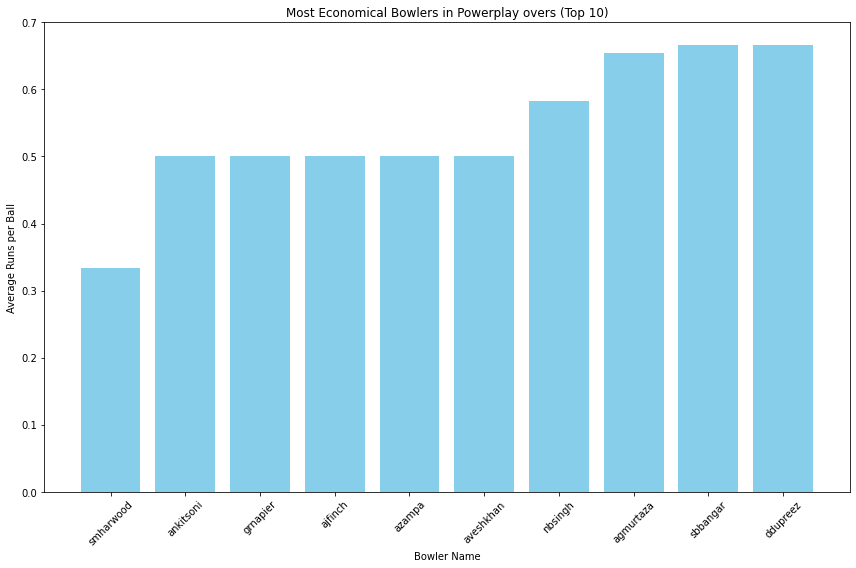

In [0]:

#Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark Dataframe

economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

#Visualization using Matplotlib
plt.figure(figsize=(12,8))

#Limiting to top 10 for clarity in the plot
top_economical_bowlers =  economical_bowlers_pd.nsmallest(10,'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'],top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel("Bowler Name")
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
import seaborn as sns

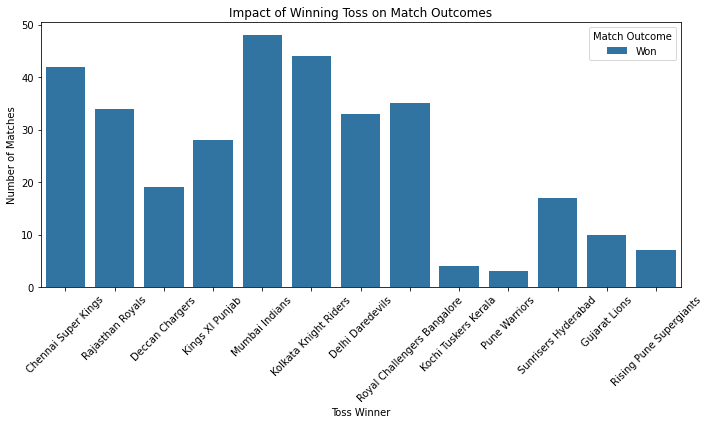

In [0]:
toss_impact_pd=  toss_impact_individual_matches.toPandas()

#Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10,6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

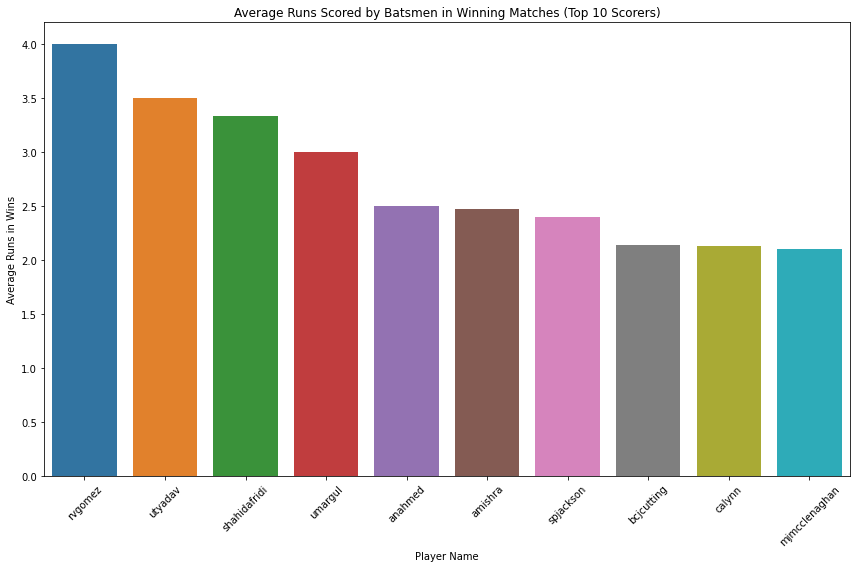

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()
#Using seaborn to plot average runs in winnng matches

plt.figure(figsize=(12,8))
top_scorers = average_runs_pd.nlargest(10,'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins',data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
#Execute SQL Query
scores_by_venue =spark.sql("""
select venue_name, avg(total_runs) as average_score, max(total_runs) as highest_score
from (
SELECT 
b.match_id, m.venue_name, sum(runs_scored) as total_runs
from ball_by_ball b 
join match m
on b.match_id = m.match_id
group by b.match_id, m.venue_name
)
group by venue_name
order by average_score desc
                           """)

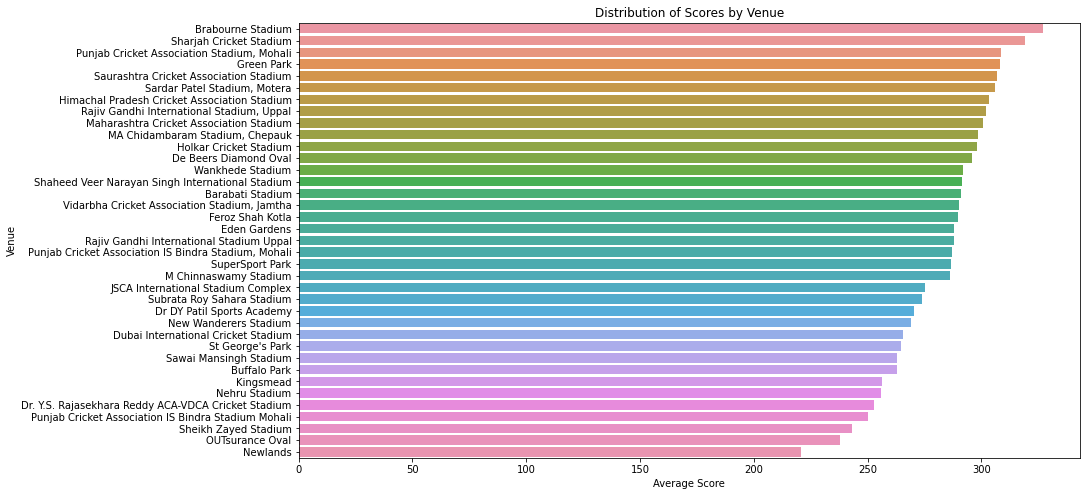

In [0]:
#Convert to pandas dataframe
scores_by_venue_pd = scores_by_venue.toPandas()

plt.figure(figsize=(14,8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
#Execute SQL Query
dismissal_types = spark.sql("""
select
out_type, count(*) as frequency
from ball_by_ball
where out_type is not null and out_type !='Not Applicable'
group by out_type
order by frequency desc
                            """)

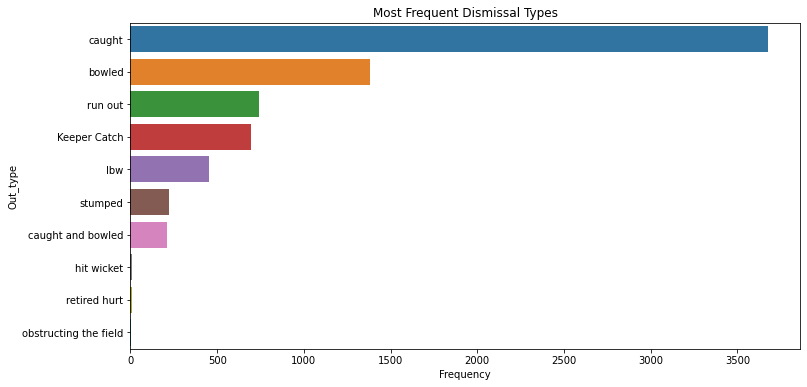

In [0]:
#Convert to pandas dataframe
dismissal_type_pd = dismissal_types.toPandas()
plt.figure(figsize=(12,6))
sns.barplot(x='frequency', y='out_type', data=dismissal_type_pd)
plt.xlabel('Frequency')
plt.ylabel('Out_type')
plt.title('Most Frequent Dismissal Types')
plt.show()

In [0]:
#Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT
team1,
count(1) as matches_played,
sum(case when toss_winner=match_winner then 1 else 0 end) as wins_after_toss
from match
where toss_winner=team1 
group by team1
order by wins_after_toss desc

                                      """)

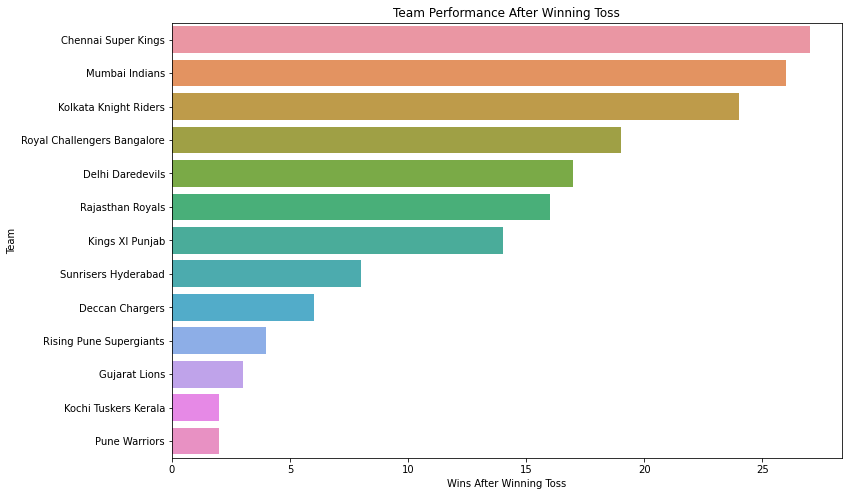

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()